# Regressão com uma Dense Neural Network (DNN)

### Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Definindo o dataset

In [2]:
x = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

### Definindo a rede neural densa

O código abaixo uma rede neural densa com um neurônio e entrada com uma dimensão.

Para mais informações sobre as classes e funções do TF, acesse: https://www.tensorflow.org/api_docs

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, name='tetete', input_shape=[1])])

### Imprimindo um resumo da arquitetura do modelo

+ O método `summary` imprime uma **descrição da arquitetura do modelo**, mostrando a disposição das camadas e o número total de parâmetros treináveis e não treináveis.
    + Parâmetros não treináveis são aqueles que **não são atualizados durante o treinamento do modelo**, ou seja, permanecem constantes.
    + Por exemplo, camadas de normalização de *batch* usam valores de média e variância dos dados de entrada para normalizá-los. Esses parâmetros são calculados e não são **otimizados**
<br/><br/>

+ Ele exibe as seguintes informações:
    + O nome de cada camada (que é gerado automaticamente, a menos o definamos ao criar a camada com o parâmetro `name`), 
    + Seu formato de saída (`None` significa que o tamanho do mini-batch pode ser qualquer um) e 
    + Seu número de parâmetros.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tetete (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Inspecionando os pesos iniciais do modelo

A inicialização dos pesos é **crucial para o bom treinamento de um modelo**, pois ela

+ **Acelera a convergência** (i.e., o aprendizado do modelo),
+ Mitiga problemas de **explosão e desaparecimento** do gradiente.
    + Explosão: os gradientes se tornam tão grandes e, consequentemente, os pesos também, levando a divergência do modelo.
    + Desaparecimento: os gradientes se tornam extremamente pequenos e, consequentemente, as atualizações dos pesos também, resultando em treinamento (i.e., aprendizado) lento ou mesmo estagnação.
<br/><br/>

**Por padrão**, os pesos do modelo são inicializados pela classe `Dense` da seguinte forma:

+ O parâmetro `kernel_initializer` define como os pesos sinápticos ($w$) são inicializados => Por padrão, usa-se a inicialização `glorot_uniform` (também chamada de **Xavier**)

    + Incializa-se os pesos usando amostras retiradas de uma **distribuição uniforme** com limites: `[-limit, limit]`, onde 
    $$\text{limit} = \sqrt{\frac{6}{(\text{fan}_{\text{in}} + \text{fan}_{\text{out}})}}$$
    + $\text{fan}_{\text{in}}$ é igual ao número de neurônios da camada anterior.
    + $\text{fan}_{\text{out}}$ é igual ao número de neurônios nessa camada sendo configurada.

+ O parâmetro `bias_initializer` define como os pesos de bias ($b$) são inicializados => Por padrão, todos os valores inciais dos pesos de bias são zerados (`zeros`).


Existem outras formas de se inicializar os pesos, para mais informações, acesse: [Initializers](https://keras.io/api/layers/initializers/)

In [5]:
# Retorna uma lista com todos os pesos.
model.get_weights()

[array([[0.814994]], dtype=float32), array([0.], dtype=float32)]

#### Acessando o peso sináptico e o de bias do modelo

In [6]:
print("w = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

w =  0.814994
b  =  0.0


### Compilando o modelo

Usamos como **otimizador** o gradiente descendente estocástico (SGD) e como **função de erro** o erro quadrático médio.

**OBS**.: 

+ O valor do passo de aprendizagem do SGD é o valor padrão da classe, que é igual a $0.01$. 

+ Para alterar esse valor, precisamos instanciar um objeto da classe SGD e passar o novo valor para seu construtor através do parâmetro `learning_rate`. 

+ Isso é válido para qualquer outro otimizador da biblioteca TensorFlow.

In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### Fazendo uma predição com o modelo inicial.

Sabemos das aulas anteriores que a melhor função hipótese é dada por $\hat{y} = -1 + 2x$, assim, quando $x=10$, o valor de $\hat{y}$ deveria ser 19.

In [8]:
print(model.predict([10.0]))

1/1 [==============================] - 1s 852ms/step
[[8.14994]]


### Treinando o modelo

In [9]:
# Ajusta o modelo aos dados (também conhecido como treinar o modelo)
history = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 182ms/step - loss: 4.7002
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 3.8700
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 3.2134
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 2.6933
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 2.2807
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1.9527
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6915
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1.4828
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3154
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1807
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0717
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9831
Epoch 13/500
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 207/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 208/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 209/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 210/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 211/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 212/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 213/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 214/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 215/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 216/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 217/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 218/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 1.9974e-04
Epoch 407/500
1/1 [==============================] - 0s 3ms/step - loss: 1.9564e-04
Epoch 408/500
1/1 [==============================] - 0s 3ms/step - loss: 1.9162e-04
Epoch 409/500
1/1 [==============================] - 0s 2ms/step - loss: 1.8768e-04
Epoch 410/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8383e-04
Epoch 411/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8005e-04
Epoch 412/500
1/1 [==============================] - 0s 3ms/step - loss: 1.7636e-04
Epoch 413/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7273e-04
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6919e-04
Epoch 415/500
1/1 [==============================] - 0s 3ms/step - loss: 1.6571e-04
Epoch 416/500
1/1 [==============================] - 0s 3ms/step - loss: 1.6231e-04
Epoch 417/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5897e-04
Epoch 

**Observações**

+ Vejam que o erro diminiu a cada nova iteração.
+ Cada iteração leva cerca de 2/3 [ms].

### Salvando o modelo treinado

Os modelos são salvos usando-se o formato chamado Hierarchical Data Format version 5 (HDF5).

Ele é um formato de arquivo binário amplamente utilizado para **armazenar grandes quantidades de dados de maneira organizada e eficiente**. 

In [10]:
model.save('my_first_trained_dnn.h5')

### Testando o modelo

Prevendo a saída de um novo dado (inédito) de entrada (também conhecido como **inferência**).

In [11]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 28ms/step
[[18.984451]]


### Por que o valor não é exatamente 19? O que pode ser feito?

### Inspecionando os pesos do modelo treinado

Sabemos que a melhor função hipótese é dada por $\hat{y} = -1 + 2x$, onde $b=-1$ e $w=2$.

In [12]:
print("w = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

w =  1.9977467
b  =  -0.99301445


#### Podemos inspecionar o modelo de forma visual usando a aplicação web chamada de [Netron](https://netron.app)

### Plotando o histórico de erros ao longo das épocas de treinamento

O objeto da classe `History` possui um atributo chamado de `history`, que é um **dicionário** com os valores do erro ao longo das épocas de treinamento.

Esse dicionário pode conter outras medidas feitas longo do treinamento do modelo, para isso, basta especificar a métrica que se quer medir através do parâmetro `metrics` do método `compile()`.

In [13]:
type(history.history)

dict

In [14]:
history.history.keys()

dict_keys(['loss'])

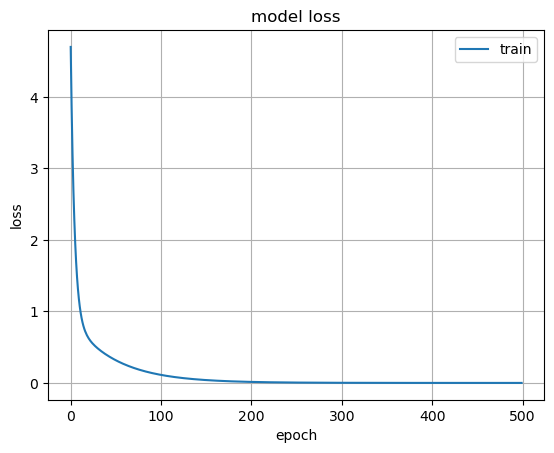

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.grid()
plt.show()

### Comparando os dados originais com a função hipótese

1/1 [==============================] - 0s 16ms/step


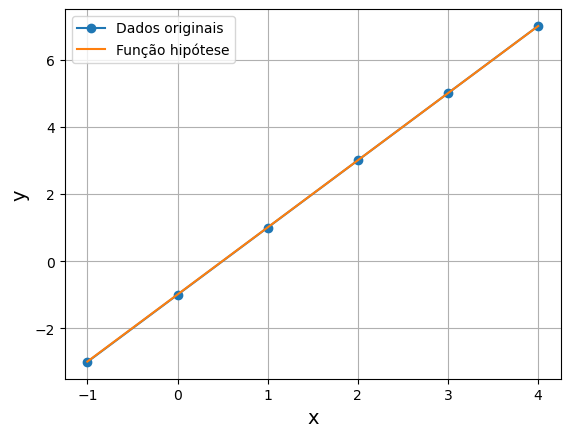

In [16]:
plt.plot(x, y, marker='o', label='Dados originais')
plt.plot(x, model.predict(x), label='Função hipótese')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()